# Assignment 1

## Name: Dhara Patel

### Description: 

### References & Tutorials Tried

* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding


## Setup

In [59]:
import numpy as np
import matplotlib.pyplot as plt
# make sure when running this file opencv will need to installed
# STEPS:
    #Open anaconda prompt
    #Run "pip install opencv-python"
    #restart jupyter notebook
import cv2


#### Image thresholding - Basic Gradient Tutorial
https://www.youtube.com/watch?v=CdltAssTMs8&ab_channel=ProgrammingKnowledge

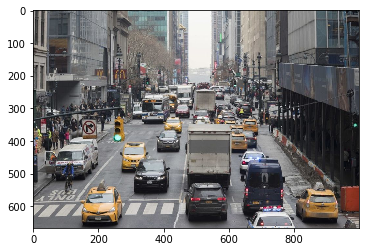

In [60]:
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to RGB
imgplot = plt.imshow(image)
plt.show() #plot the original image

The histogram below shows number of pixels for ever pixel value from the image above from 0 to 255.
matplotlib shows pixel distribution on grayscale not on colorscale.


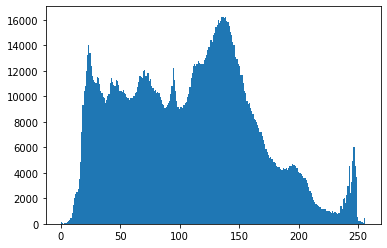

In [61]:
plt.hist(image.ravel(),256,[0,256]); plt.show()

Using opencv's histogram function: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
As you can see the overall pixel distribution does not change on the intensity range but number of pixels per each intensity chnages becasue cv2.calcHist() allows for pixel distribution for the rgb scale instead of grayscale like above.


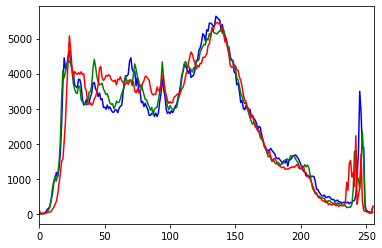

In [62]:
color = ('b','g','r')
for x,y in enumerate(color):
    histr = cv2.calcHist([image],[x],None,[256],[0,256])
    plt.plot(histr,color = y)
    plt.xlim([0,256])
plt.show()

The following code originates from: https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python
It was used to learn, observe, and possibly utilize clustering functionality provided by opencv.

In [63]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values,pixel_values.shape)

[[160. 151. 144.]
 [161. 154. 146.]
 [169. 161. 158.]
 ...
 [171. 167. 164.]
 [162. 158. 155.]
 [168. 164. 161.]] (667000, 3)


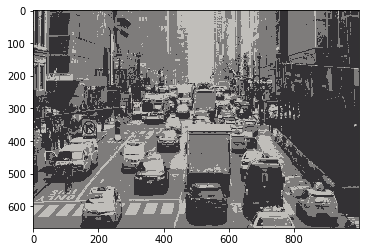

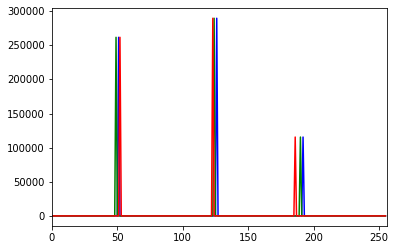

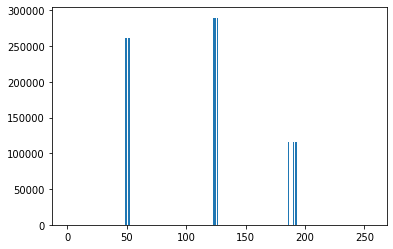

In [76]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)# number of clusters (K)
totalClusters = 3
_, labels, (centers) = cv2.kmeans(pixel_values, totalClusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# construct the segmented image
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()
color = ('b','g','r')
for x,y in enumerate(color):
    histr = cv2.calcHist([segmented_image],[x],None,[256],[0,256])
    plt.plot(histr,color = y)
    plt.xlim([0,256])
plt.show()
plt.hist(segmented_image.ravel(),256,[0,256]); plt.show()

Above image shows image created from the original image by flattening the image then distributing it into clusters. We can observe the pixel distribution in the image if you compare the original image and graphs.

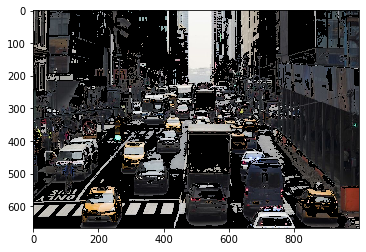

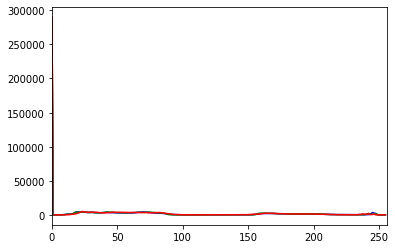

In [74]:
# when cluster 1 is diabled any pixel part of cluster 1 will turn black
masked_image1 = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image1 = masked_image1.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image1[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image1 = masked_image1.reshape(image.shape)
# show the image
plt.imshow(masked_image1)
plt.show()
color = ('b','g','r')
for x,y in enumerate(color):
    histr = cv2.calcHist([masked_image1],[x],None,[256],[0,256])
    plt.plot(histr,color = y)
    plt.xlim([0,256])
plt.show()

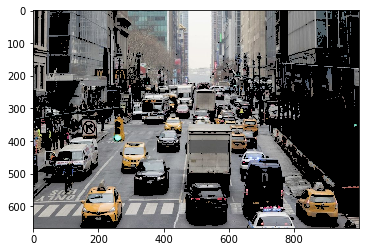

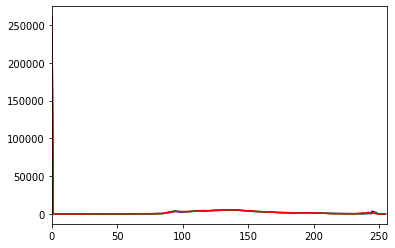

In [73]:
# when cluster 0 is diabled any pixel part of cluster 0 will turn black
#this block of code is copy of the piece of code two block aabove just modified to diable cluster 0 instead of cluster 1
masked_image0 = np.copy(image)
masked_image0 = masked_image0.reshape((-1, 3))
cluster = 0
masked_image0[labels == cluster] = [0, 0, 0]
masked_image0 = masked_image0.reshape(image.shape)
plt.imshow(masked_image0)
plt.show()
color = ('b','g','r')
for x,y in enumerate(color):
    histr = cv2.calcHist([masked_image0],[x],None,[256],[0,256])
    plt.plot(histr,color = y)
    plt.xlim([0,256])
plt.show()

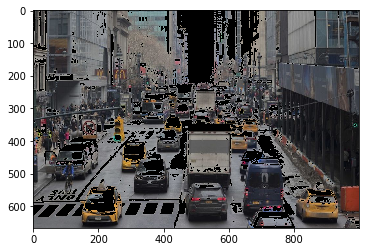

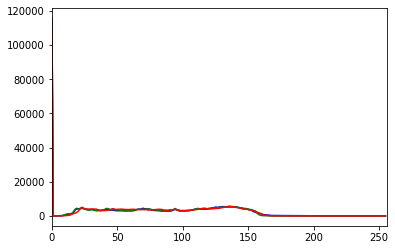

In [72]:
# when cluster 2 is diabled any pixel part of cluster 2 will turn black
#this block of code is copy of the piece of code two block aabove just modified to diable cluster 2 instead of cluster 1
masked_image2 = np.copy(image)
masked_image2 = masked_image2.reshape((-1, 3))
cluster = 2
masked_image2[labels == cluster] = [0, 0, 0]
masked_image2 = masked_image2.reshape(image.shape)
plt.imshow(masked_image2)
plt.show()
color = ('b','g','r')
for x,y in enumerate(color):
    histr = cv2.calcHist([masked_image2],[x],None,[256],[0,256])
    plt.plot(histr,color = y)
    plt.xlim([0,256])
plt.show()

In the three images above we can see that Cluster 2 hold value that are on the lighter end of the color spectrum and cluster 1 holds the values on the darker end of the color spectrum. We can see the variations from the original image to different clusters and what the image looks like when all three clusters are active.

Plotting rgb value histrogram as well as matplotlib histrogram varifies pixel distribution. Keep in mind that the rgb histogram is for the two layers that are active.